In [1]:
pip install torch torchvision opencv-python

In [2]:
pip install ultralytics opencv-python torch torchvision torchaudio moviepy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.1/875.1 kB 36.9 MB/s eta 0:00:00


In [3]:
pip install opencv-python-headless

#### Pre-Trained model Yolo8

In [5]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [6]:
import os
# Navigate to a folder in your Google Drive
os.chdir("/content/drive/MyDrive/Deep Learning")
# List files in the folder
os.listdir()

['IMG_3773.MOV',
 'output_video.mp4',
 'Monica.zip',
 'Yolov8_object_detection_on_custom_dataset_(3).ipynb',
 'Yolo8',
 'LokareHW4 (1).ipynb',
 'LokareHW4.ipynb']

In [13]:
import os
import cv2
import torch
from ultralytics import YOLO

### Define video path and output directories

In [16]:
video_path = 'IMG_3773.MOV'
frames_dir = 'Frames'
output_frames_dir = 'OutputFrames'

### Creating directories to store frames

In [19]:
os.makedirs(frames_dir, exist_ok=True)
os.makedirs(output_frames_dir, exist_ok=True)

### Extracting frames from the video

In [22]:
cap = cv2.VideoCapture(video_path)
if not cap.isOpened():
    print("Error: Could not open the video.")
else:
    frame_count = 0
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        cv2.imwrite(f'{frames_dir}/frame_{frame_count:04d}.jpg', frame)
        frame_count += 1

    cap.release()
    print(f'Total number of frames extracted: {frame_count}')

Total number of frames extracted: 193


### Load the pre-trained YOLOv8 model

In [13]:
model = YOLO('yolov8s.pt')  # Change the path if using a custom-trained model

100%|██████████| 21.5M/21.5M [00:00<00:00, 41.6MB/s]


In [14]:
for i in range(frame_count):
    frame = cv2.imread(f'{frames_dir}/frame_{i:04d}.jpg')

    # Perform inference
    results = model(frame)
    results = model(frame, verbose=False)

    # drawing bounding boxes
    for result in results:
        boxes = result.boxes
        for box in boxes:
            if len(box.xyxy) == 0:
                continue

            x1, y1, x2, y2 = box.xyxy[0]  # Get coordinates
            conf = box.conf[0]  # Get confidence score
            cls = int(box.cls[0])  # Get class ID

            label = model.names[cls]  # Automatically get class name using YOLOv8 model's attribute

            # Drawing bounding boxes for all detected objects
            cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (255, 0, 0), 2)
            cv2.putText(frame, f'{label} {conf:.2f}', (int(x1), int(y1)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    cv2.imwrite(f'{output_frames_dir}/output_frame_{i:04d}.jpg', frame)
print('Inference completed and frames saved.')


0: 384x640 4 persons, 4 cars, 1 truck, 1 traffic light, 1 fire hydrant, 39.6ms
Speed: 11.2ms preprocess, 39.6ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)
Inference completed and frames saved.


### Create a video from processed frames

In [15]:
output_video_path = 'After_Inference.mp4'
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
fps = 30

frame_example_path = f'{output_frames_dir}/output_frame_0000.jpg'
frame_example = cv2.imread(frame_example_path)

if frame_example is None:
    print(f"Error: Unable to read the frame from {frame_example_path}.")
else:
    height, width, _ = frame_example.shape
    out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

    for i in range(frame_count):
        frame_path = f'{output_frames_dir}/output_frame_{i:04d}.jpg'
        frame = cv2.imread(frame_path)
        if frame is None:
            print(f"Warning: Unable to read the frame from {frame_path}. Skipping this frame.")
            continue
        out.write(frame)

    out.release()
    print(f'Output video saved as: {output_video_path}')

Output video saved as: After_Inference.mp4


### YOLO8 object detection for images dataset

In [16]:
# Navigate to a folder in your Google Drive
os.chdir("/content/drive/MyDrive/Deep Learning/Yolo8")
os.listdir()

['README.dataset.txt',
 'README.roboflow.txt',
 '.DS_Store',
 'test',
 'train',
 'valid',
 'data.yaml',
 'yolov8s.pt',
 'runs']

In [17]:
HOME = os.getcwd()
print(HOME)

/content/drive/MyDrive/Deep Learning/Yolo8


In [ ]:
!pip install ultralytics==8.0.196
from IPython import display
display.clear_output()
import ultralytics
ultralytics.checks()
from ultralytics import YOLO
from IPython.display import display, Image

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 36.5/107.7 GB disk)


In [ ]:
# Upgrade to latest version
!pip install -U albumentations

# Alternatively, downgrade if the issue persists
!pip install albumentations==1.3.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.6/214.6 kB 5.6 MB/s eta 0:00:00
  Attempting uninstall: albucore
    Found existing installation: albucore 0.0.16
    Uninstalling albucore-0.0.16:
      Successfully uninstalled albucore-0.0.16
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.4.15
    Uninstalling albumentations-1.4.15:
      Successfully uninstalled albumentations-1.4.15
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.5/123.5 kB 5.0 MB/s eta 0:00:00
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.4.16
    Uninstalling albumentations-1.4.16:
      Successfully uninstalled albumentations-1.4.16


### Training epoch =25

In [ ]:
%cd /content/drive/MyDrive/Deep Learning/Yolo8
!yolo task=detect mode=train model=yolov8s.pt data='/content/drive/MyDrive/Deep Learning/Yolo8/data.yaml' epochs=25 imgsz=224

/content
/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu'), file

### Listing files 

In [ ]:
!ls runs/detect/train2/

args.yaml					    PR_curve.png	train_batch511.jpg
confusion_matrix_normalized.png			    R_curve.png		train_batch512.jpg
confusion_matrix.png				    results.csv		val_batch0_labels.jpg
events.out.tfevents.1727488019.6e4b465ea736.8208.0  results.png		val_batch0_pred.jpg
F1_curve.png					    train_batch0.jpg	val_batch1_labels.jpg
labels_correlogram.jpg				    train_batch1.jpg	val_batch1_pred.jpg
labels.jpg					    train_batch2.jpg	weights
P_curve.png					    train_batch510.jpg


### Displaying confusion matrix

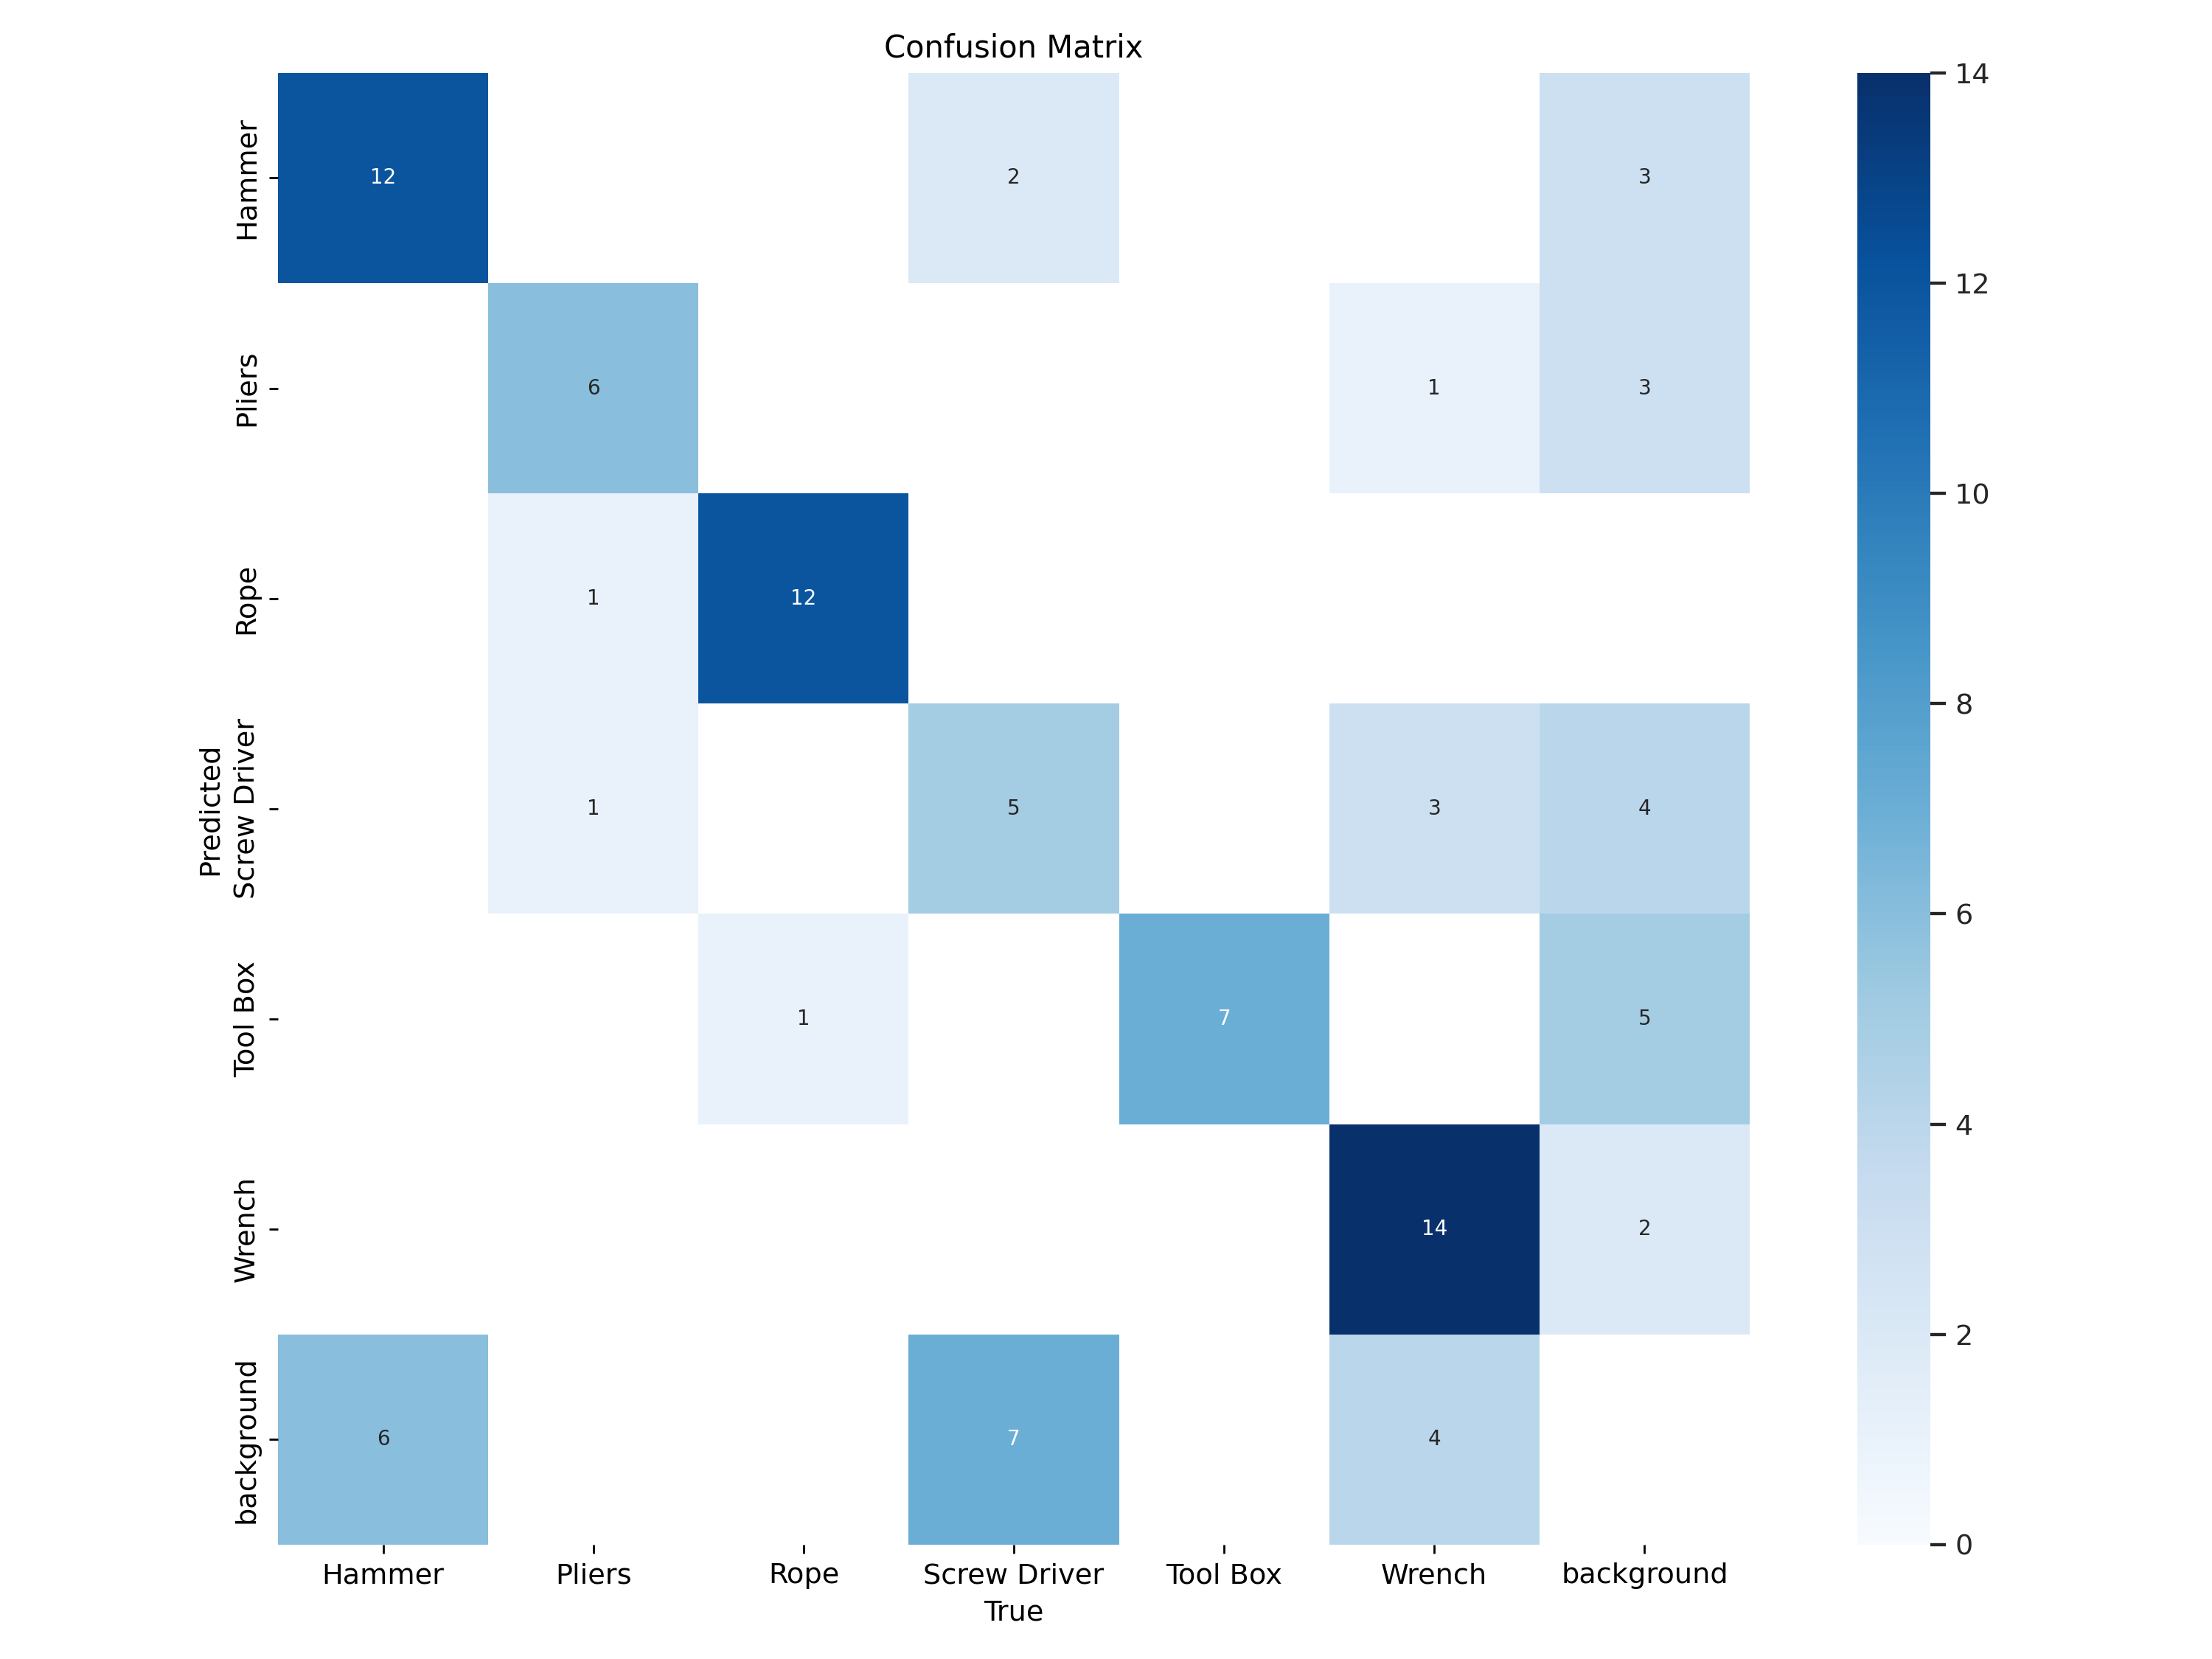

In [ ]:
Image(filename='runs/detect/train2/confusion_matrix.png', width=600)

### Displaying metrics graphs from train folder

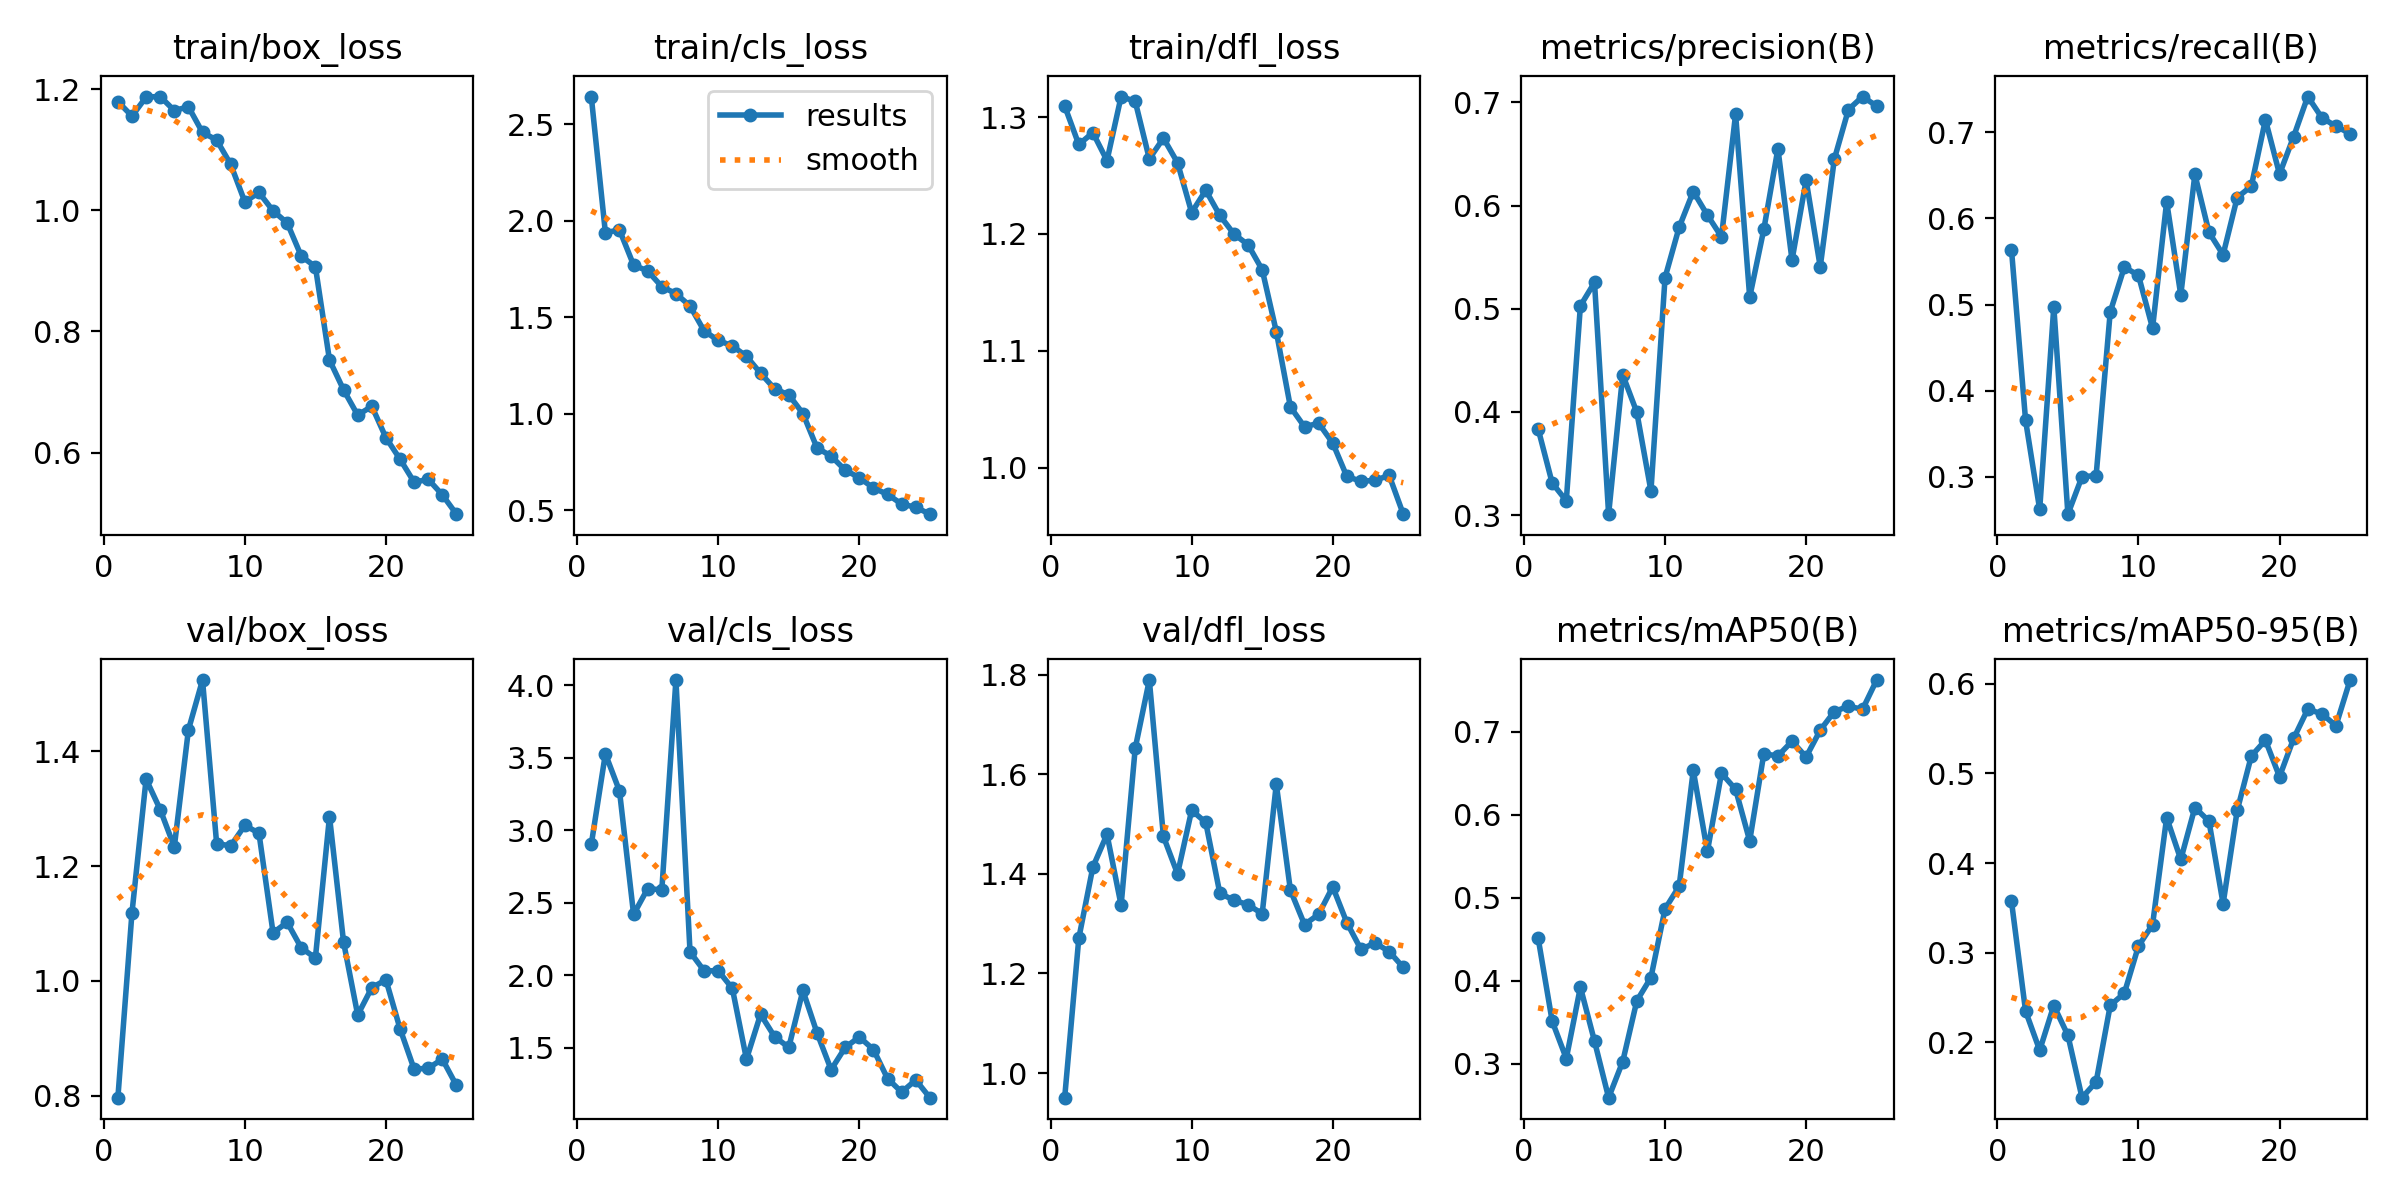

In [ ]:
Image(filename='runs/detect/train2/results.png', width=600)

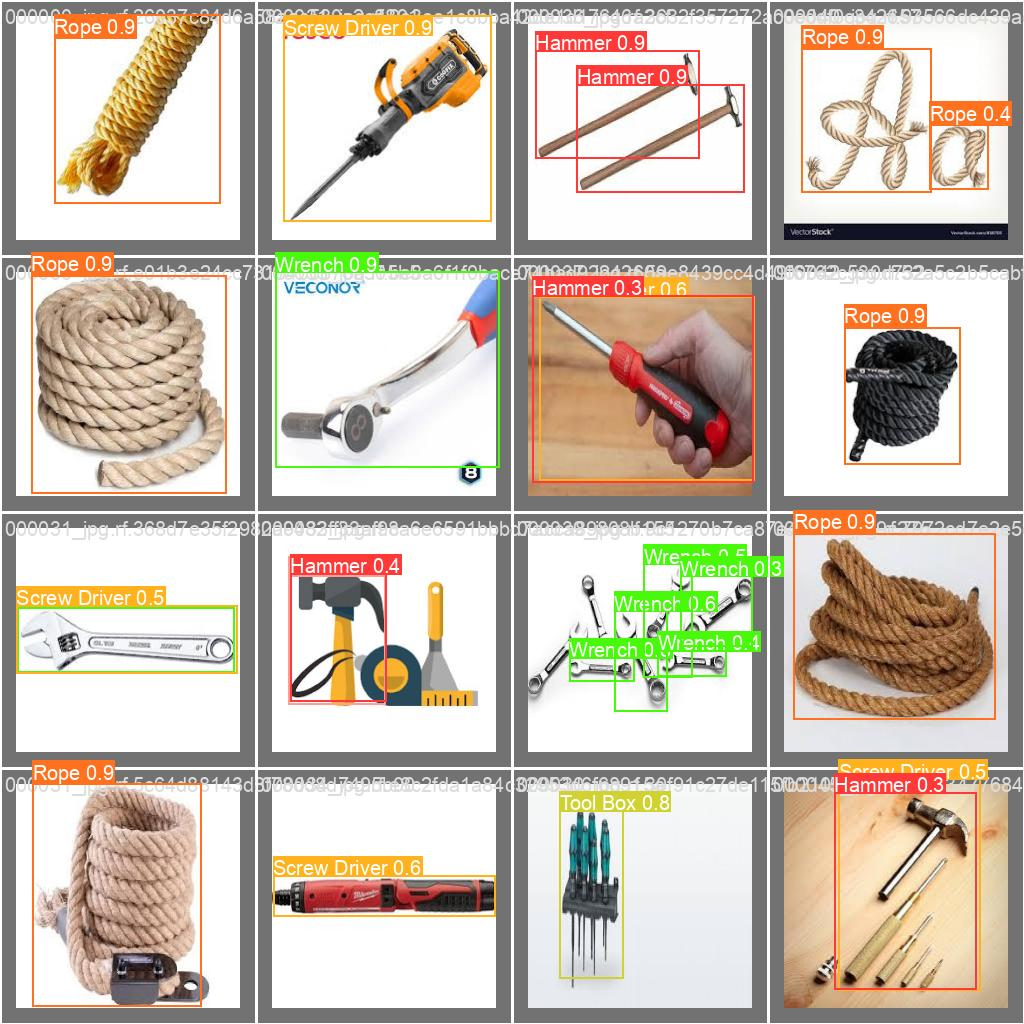

In [ ]:
Image(filename='runs/detect/train2/val_batch0_pred.jpg', width=600)

### Validating 

In [ ]:
!yolo task=detect mode=val model=runs/detect/train2/weights/best.pt data=data.yaml

/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu'), file  # load


### Predicting 

In [ ]:
!yolo task=detect mode=predict model=runs/detect/train2/weights/best.pt conf=0.25 source='/content/drive/MyDrive/Deep Learning/Yolo8/test/images'

/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu'), file  # load


In [ ]:
import glob
from IPython.display import Image, display

### Displaying predicted images

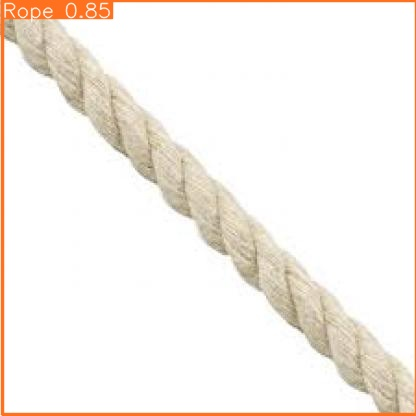

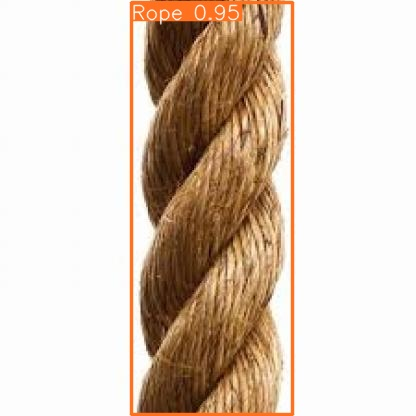

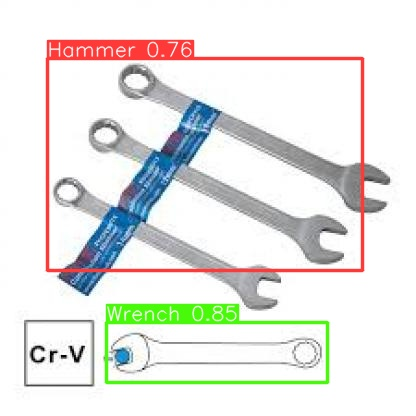

In [ ]:
for image_path in glob.glob('runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

### Using detectron from image dataset

In [1]:
!pip install pyyaml==5.1
import torch
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.2/274.2 kB 10.6 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
torch:  2.4 ; cuda:  cu121
  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-1o552n7l
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-1o552n7l
  Resolved https://github.com/facebookresearch/detectron2.git to commit ebe8b45437f86395352ab13402ba45b75b4d1ddb
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━

### Setup detectron2 

In [2]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.data.datasets import register_coco_instances
from detectron2.engine import DefaultTrainer
from detectron2.utils.visualizer import ColorMode
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader

### Autodownload dataset

In [3]:
!curl -L "https://universe.roboflow.com/ds/ItjVxCrj6L?key=mTM6h63lHQ" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   901  100   901    0     0   1853      0 --:--:-- --:--:-- --:--:--  1857
100 9069k  100 9069k    0     0  3104k      0  0:00:02  0:00:02 --:--:-- 5134k
Archive:  roboflow.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
   creating: test/
 extracting: test/000002_jpg.rf.3fe959f5175a87e988c5a5f69d779fcd.jpg  
 extracting: test/000007_jpg.rf.4fea82fe27d57392d3bea4fee5d955f2.jpg  
 extracting: test/000007_jpg.rf.60dbc245bf7d0b7c5455cf7333f99164.jpg  
 extracting: test/000008_jpg.rf.1c9fac7314f7c395684d767630d8435a.jpg  
 extracting: test/000008_jpg.rf.2ec3ae0f45aad59174c2139b1ab2c04c.jpg  
 extracting: test/000008_jpg.rf.92c9368abc042a5793ad34a08e16ccc7.jpg  
 extracting: test/000013_jpg.rf.e379ee03d9b72a5439ae32dbb693de3a.jpg  
 extracting: test/000016_jpg.rf.49caa35a4fa6c64f926aa19207624c03.jpg 

### Registering coco instances

In [4]:
register_coco_instances("my_dataset_train", {}, "/content/train/_annotations.coco.json", "/content/train")
register_coco_instances("my_dataset_test", {}, "/content/test/_annotations.coco.json", "/content/test")

### Visualizing the training data

WARNING [09/29 20:41:19 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[09/29 20:41:19 d2.data.datasets.coco]: Loaded 534 images in COCO format from /content/train/_annotations.coco.json


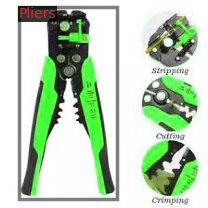

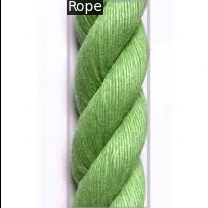

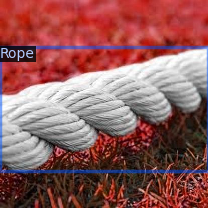

In [5]:
my_dataset_train_metadata = MetadataCatalog.get("my_dataset_train")
dataset_dicts = DatasetCatalog.get("my_dataset_train")
for d in random.sample(dataset_dicts, 3):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=my_dataset_train_metadata, scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    cv2_imshow(vis.get_image()[:, :, ::-1])

### Training the data

In [6]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("my_dataset_train",)
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml")  # Let training initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.0025
cfg.SOLVER.MAX_ITER = 500 
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128 
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 6

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=True)
trainer.train()

[09/29 20:42:02 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_280758.pkl: 167MB [00:00, 262MB/s]                           
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[09/29 20:42:03 d2.engine.train_loop]: Starting training from iteration 0


/usr/local/lib/python3.10/dist-packages/torch/functional.py:513: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3609.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[09/29 20:42:14 d2.utils.events]:  eta: 0:02:32  iter: 19  total_loss: 2.359  loss_cls: 1.855  loss_box_reg: 0.3535  loss_rpn_cls: 0.008137  loss_rpn_loc: 0.01502    time: 0.3112  last_time: 0.2619  data_time: 0.0250  last_data_time: 0.0187   lr: 9.7405e-05  max_mem: 1738M
[09/29 20:42:23 d2.utils.events]:  eta: 0:02:22  iter: 39  total_loss: 0.9899  loss_cls: 0.4812  loss_box_reg: 0.4111  loss_rpn_cls: 0.003884  loss_rpn_loc: 0.01026    time: 0.3043  last_time: 0.2955  data_time: 0.0082  last_data_time: 0.0053   lr: 0.00019731  max_mem: 1738M
[09/29 20:42:29 d2.utils.events]:  eta: 0:02:11  iter: 59  total_loss: 0.8257  loss_cls: 0.3699  loss_box_reg: 0.4346  loss_rpn_cls: 0.00224  loss_rpn_loc: 0.01581    time: 0.3029  last_time: 0.2808  data_time: 0.0137  last_data_time: 0.0127   lr: 0.0002972  max_mem: 1738M
[09/29 20:42:35 d2.utils.events]:  eta: 0:02:04  iter: 79  total_loss: 0.7102  loss_cls: 0.2967  loss_box_reg: 0.3884  loss_rpn_cls: 0.006335  loss_rpn_loc: 0.014    time: 0.29

### Test the dataset

In [8]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5 
cfg.DATASETS.TEST = ("my_dataset_test", )
predictor = DefaultPredictor(cfg)

[09/29 20:46:10 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from ./output/model_final.pth ...


/usr/local/lib/python3.10/dist-packages/fvcore/common/checkpoint.py:252: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(f, map_location=torch.device("cpu"))

In [9]:
test_metadata = MetadataCatalog.get("my_dataset_test")

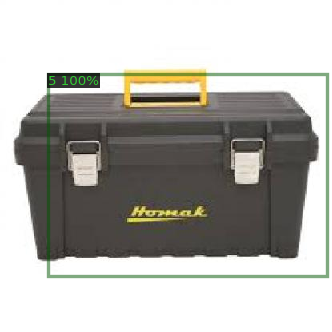

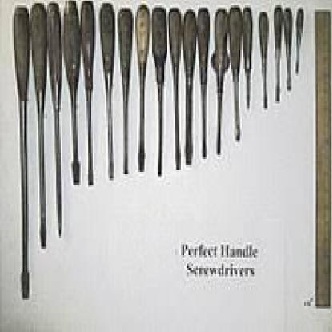

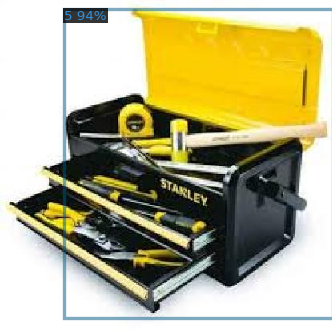

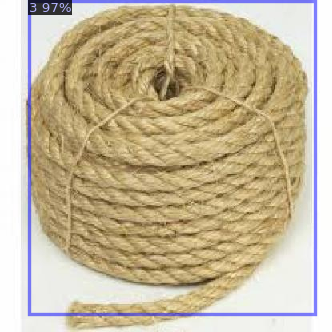

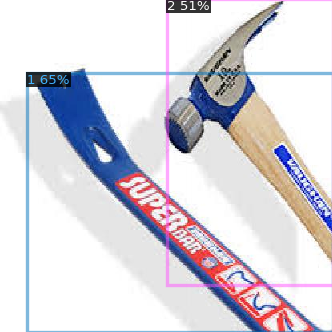

In [10]:
# Get all images from the folder and slice to only get the first 5
image_paths = glob.glob('/content/test/*jpg')[:5]

for imageName in image_paths:
    # Read the image
    im = cv2.imread(imageName)

    # Run prediction on the image
    outputs = predictor(im)

    # Create a visualizer object for the image
    v = Visualizer(im[:, :, ::-1],
                   metadata=test_metadata,
                   scale=0.8
                   )

    # Draw instance predictions on the image
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

    # Show the image with predictions
    cv2_imshow(out.get_image()[:, :, ::-1])


### Predicted labels and matrix

In [11]:
evaluator = COCOEvaluator("my_dataset_test", output_dir= "./output")
val_loader = build_detection_test_loader(cfg, "my_dataset_test")
print(inference_on_dataset(predictor.model, val_loader, evaluator))

WARNING [09/29 20:46:39 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[09/29 20:46:39 d2.data.datasets.coco]: Loaded 26 images in COCO format from /content/test/_annotations.coco.json
[09/29 20:46:39 d2.data.build]: Distribution of instances among all 7 categories:
|  category  | #instances   |   category   | #instances   |  category  | #instances   |
|:----------:|:-------------|:------------:|:-------------|:----------:|:-------------|
|   aiHub    | 0            |    Hammer    | 6            |   Pliers   | 4            |
|    Rope    | 5            | Screw Driver | 12           |  Tool Box  | 4            |
|   Wrench   | 14           |              |              |            |              |
|   total    | 45           |              |              |            |              |
[09/29 20:46:39 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800)

### Visualizing with labels in the images

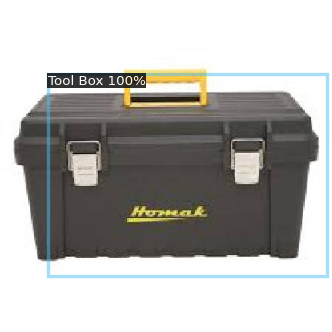

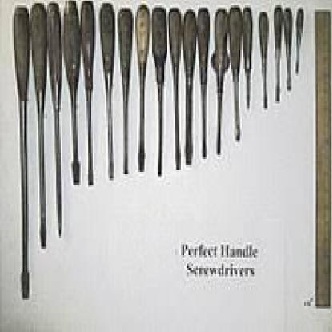

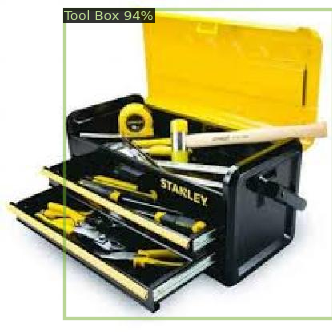

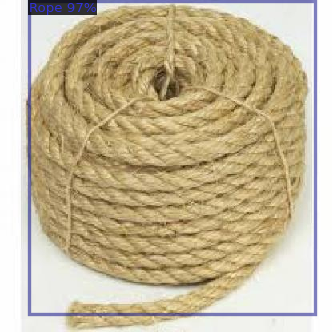

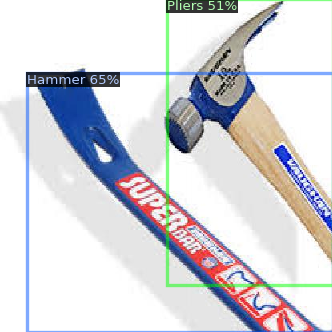

In [14]:
for imageName in image_paths:
    im = cv2.imread(imageName)
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1],
                   metadata=test_metadata,
                   scale=0.8,
                   instance_mode=ColorMode.IMAGE
                   )
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    cv2_imshow(out.get_image()[:, :, ::-1])